Name: Lany Malis
<br>
Class: ITE-A
<br>
Project: Animal Recognition Using Super Vector Machine
<br>
Step2:Prediction  

# Animal Recognition Using Super Vector Machine

## 1. Library

- pickle : for saving and loading module
- random : for generating and shuffling sequence 
- matplotlib : for visualization date
- sklearn.model_selection : for splitting the data into training and testing sets
- sklearn.svm : for implementing SVMs module

In [10]:
#Library 
import pickle                                           
import random                                           
import matplotlib.pyplot as plt                         
from sklearn.model_selection import train_test_split    
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## 2. Data Loading

First, we load data that already preprocessed by using pickle. Second, we use random to shuffle data inpurpose to make it more robustness and generalizable. Third, we create two list which are feature and labels for storing data feature and label. Last, we train the data in half of size of test data. 

In [4]:
#Load and Read data store in data 
pick_in = open('data1.pickle', 'rb')
data = pickle.load(pick_in)
pick_in.close()

In [5]:
#Initialize features and labels
random.shuffle(data) 
features = []
labels = []

In [6]:
#Get feature and label from data store in each arrays
for feature, label in data:
    features.append(feature)
    labels.append(label)

In [7]:
#50% of Data is token for testing
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.50)

## 3. Prediction

For the prediction, we test the model by creating prediction and accuracy to evaluate the model while testing and we show the result.

Accuracy: 0.8903162055335968
Prediction: cats
Accuracy: 0.8903162055335968
Prediction: dogs


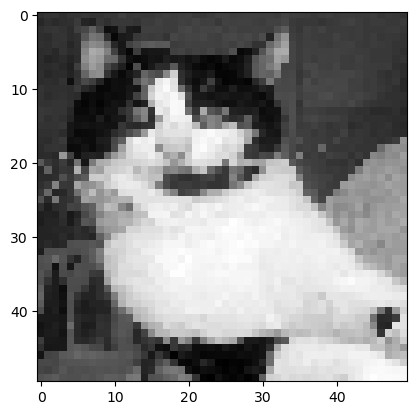

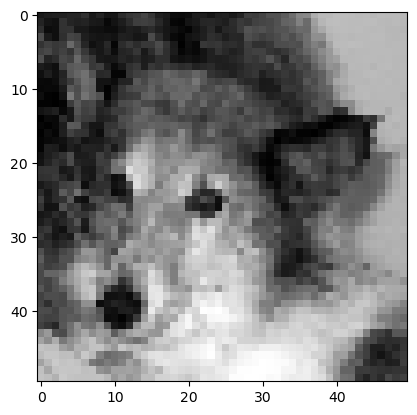

Confusion Matrix:
[[474  49]
 [ 62 427]]
Classification Report:
              precision    recall  f1-score   support

        cats       0.88      0.91      0.90       523
        dogs       0.90      0.87      0.88       489

    accuracy                           0.89      1012
   macro avg       0.89      0.89      0.89      1012
weighted avg       0.89      0.89      0.89      1012



In [11]:
# #Model Training
# model = SVC(C=1, kernel='poly', gamma='auto')
# model.fit(xtrain, ytrain)

# #Build Model and Save as model.sav
# pick = open('model.sav', 'wb')
# pickle.dump(model,  pick)
# pick.close()

# Read Model for Prediction
pick = open('model.sav', 'rb')
model = pickle.load(pick)
pick.close()

# Create prediction and accuracy objects for test
prediction = model.predict(xtest)
accuracy = model.score(xtest, ytest)

# Divide 2 Categories Dataset
categories = ['cats', 'dogs']

# Display the Accuracy and the prediction of animal
print('Accuracy:', accuracy)
print('Prediction:', categories[prediction[0]])

print('Accuracy:', accuracy)
print('Prediction:', categories[prediction[7]])

# Display pet image
pet = xtest[0].reshape(50, 50)
plt.imshow(pet, cmap='gray')
plt.show()

pet1 = xtest[7].reshape(50, 50)
plt.imshow(pet1, cmap='gray')
plt.show()

# Calculate and display confusion matrix
cm = confusion_matrix(ytest, prediction)
print('Confusion Matrix:')
print(cm)

# Calculate and display recall, F1 score, and precision
cr = classification_report(ytest, prediction, target_names=categories)
print('Classification Report:')
print(cr)

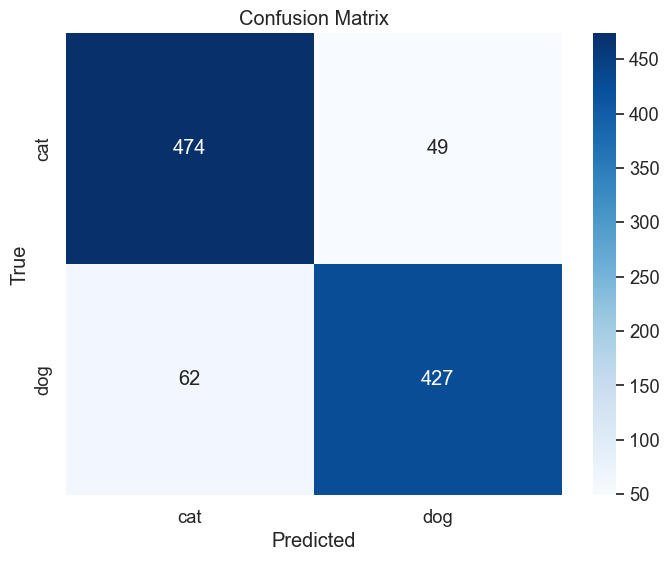

In [12]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=['cat', 'dog'], yticklabels=['cat', 'dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()